# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.


_____________

1. Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

### Carregando os pacotes:

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carregando e visualizando o banco de dados:

In [15]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


### Visualizando os dados:

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

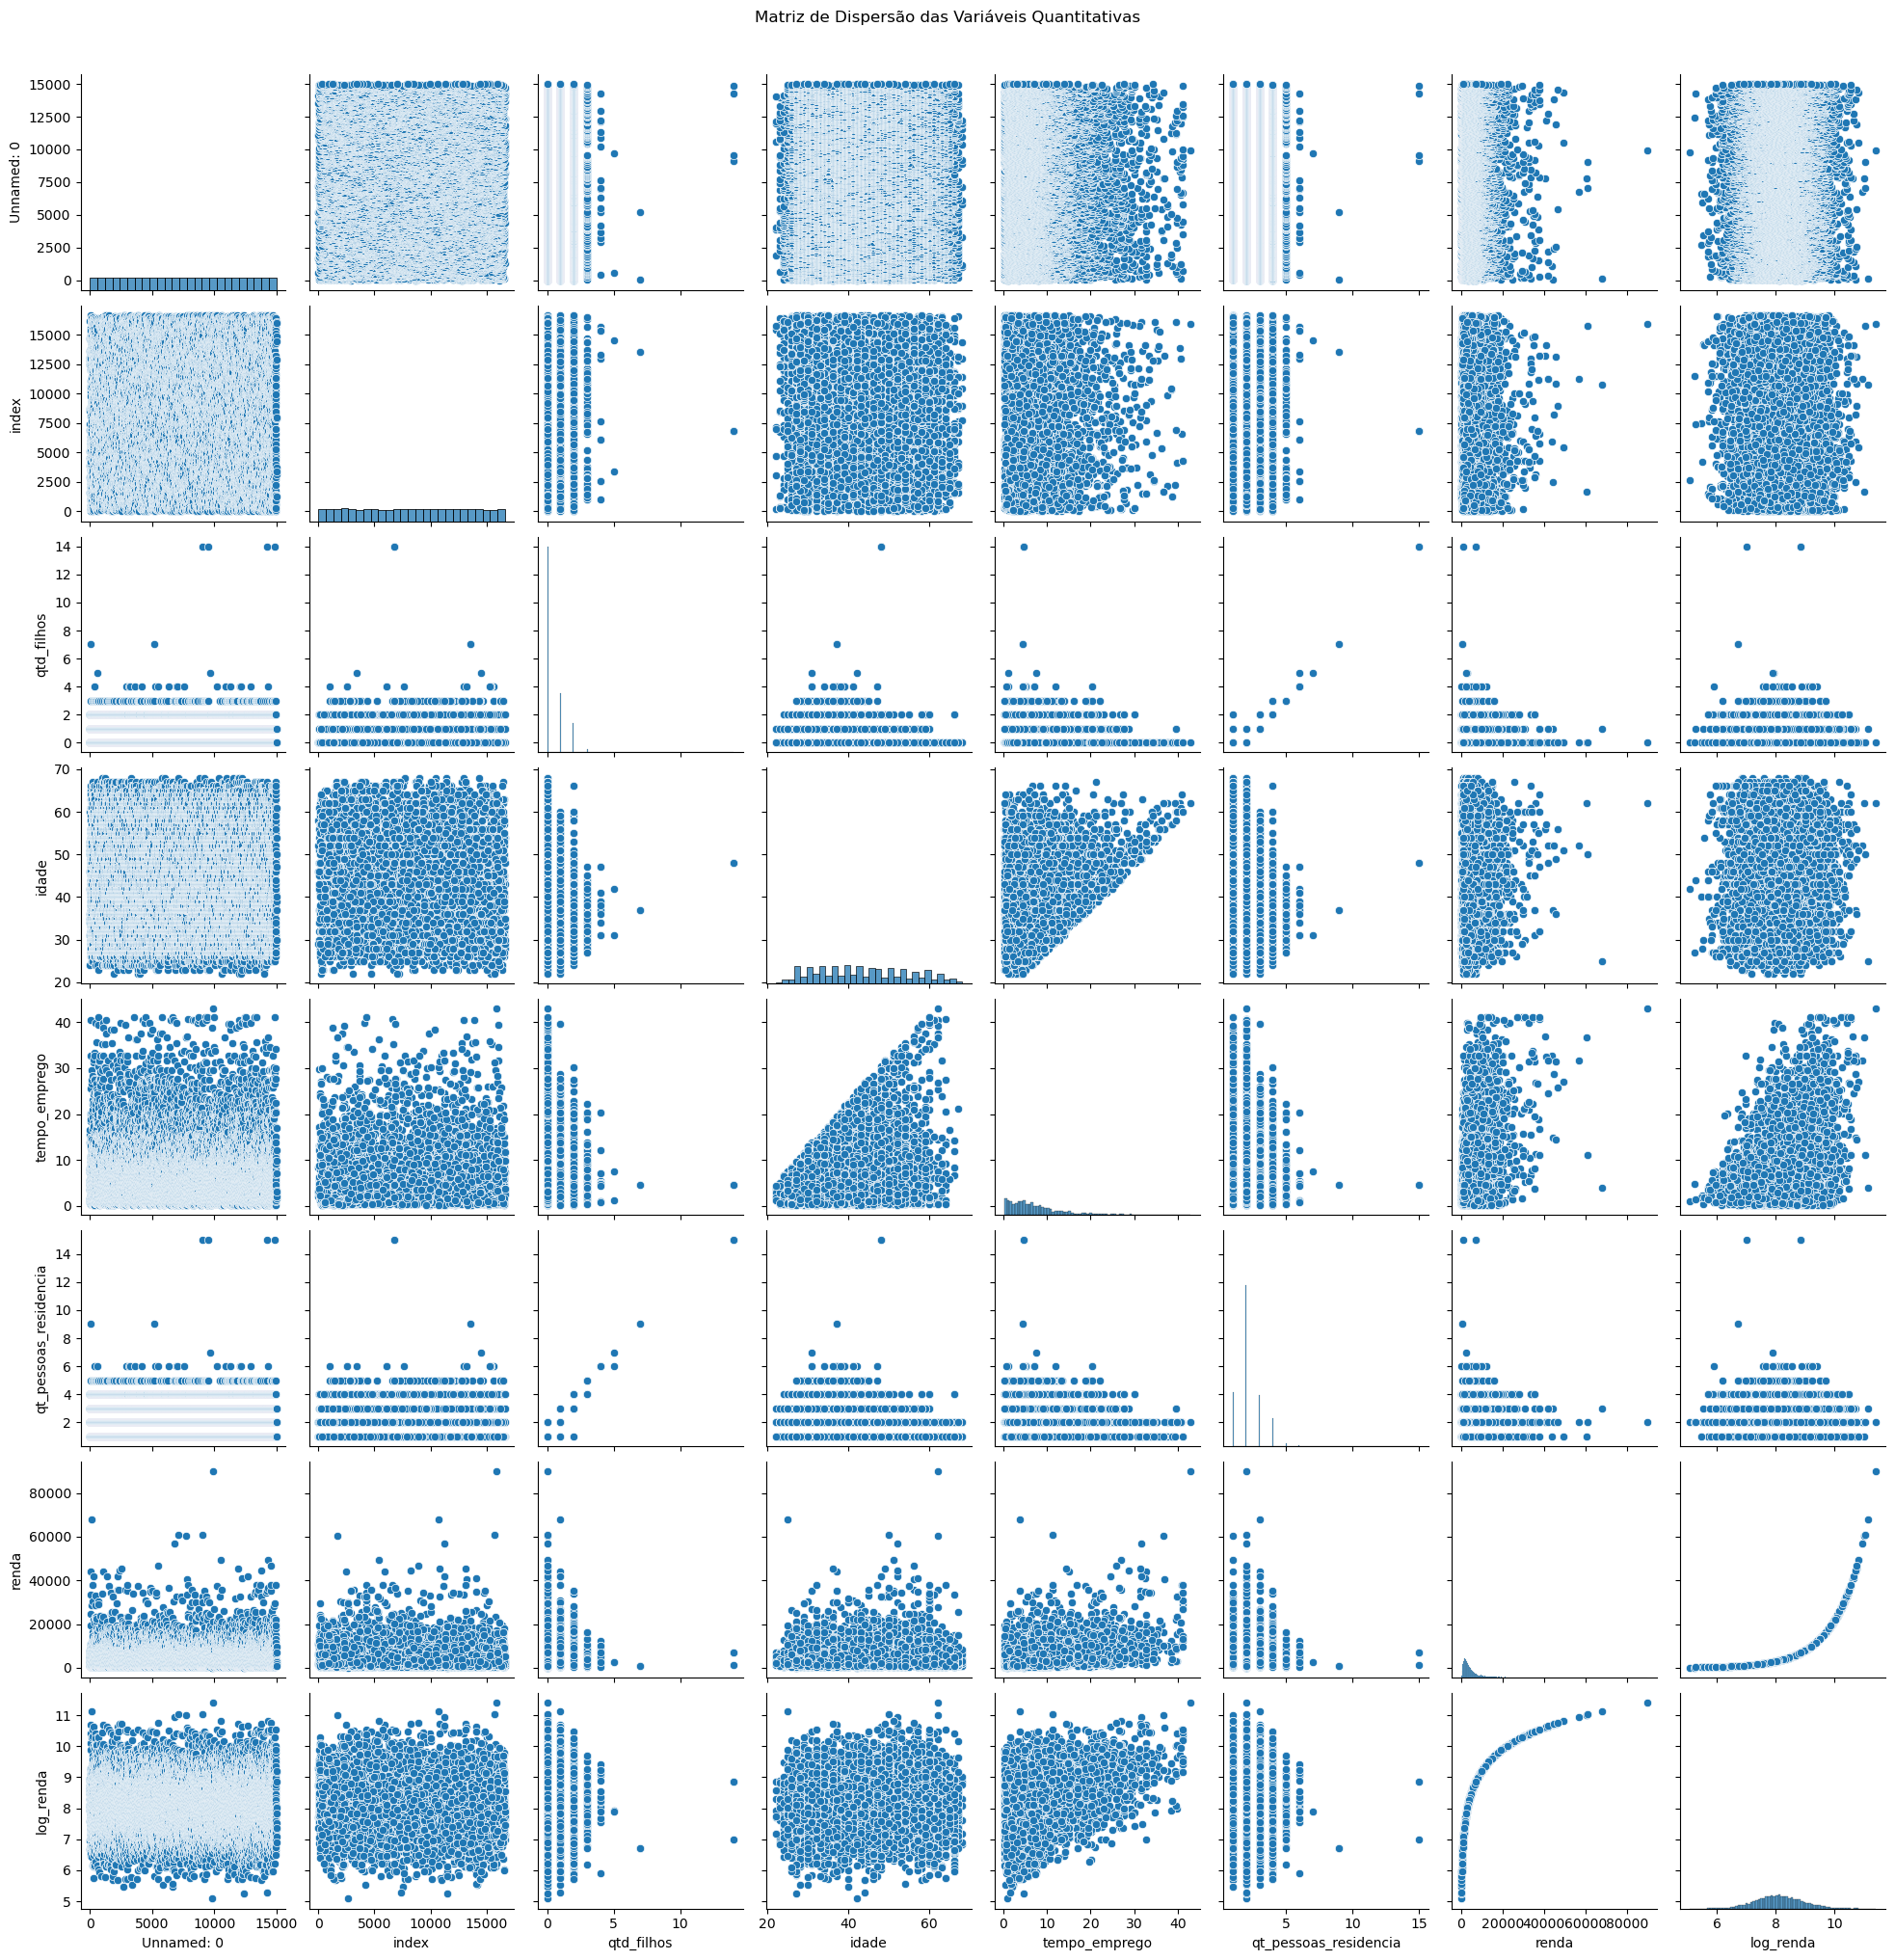

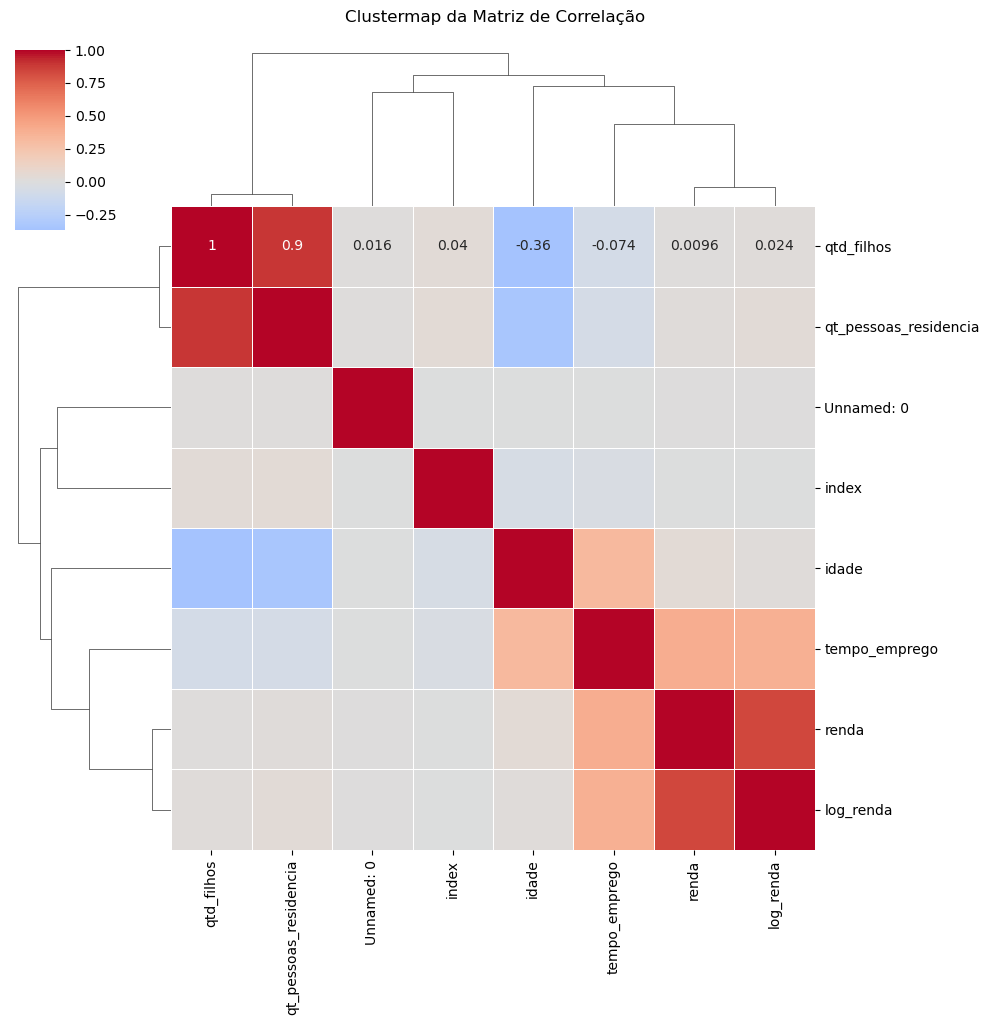

In [79]:
# Selecionando apenas as variáveis quantitativas:
quantitative_vars = df.select_dtypes(include=[np.number])

# Substituindo valores infinitos por NaN:
quantitative_vars.replace([np.inf, -np.inf], np.nan, inplace=True)

# Matriz de dispersão:
sns.pairplot(quantitative_vars)
plt.suptitle("Matriz de Dispersão das Variáveis Quantitativas", y=1.02)
plt.show()

# Matriz de correlação:
corr_matrix = quantitative_vars.corr()

# Clustermap da matriz de correlação:
clustermap = sns.clustermap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.suptitle("Clustermap da Matriz de Correlação", y=1.02)
plt.show()


### Análise:

#### 1. Nos parece que as correlações aqui estão bem baixas. Exceto pela questão da renda e quantidades de filhos.

______________

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

### Visualizando os dados:

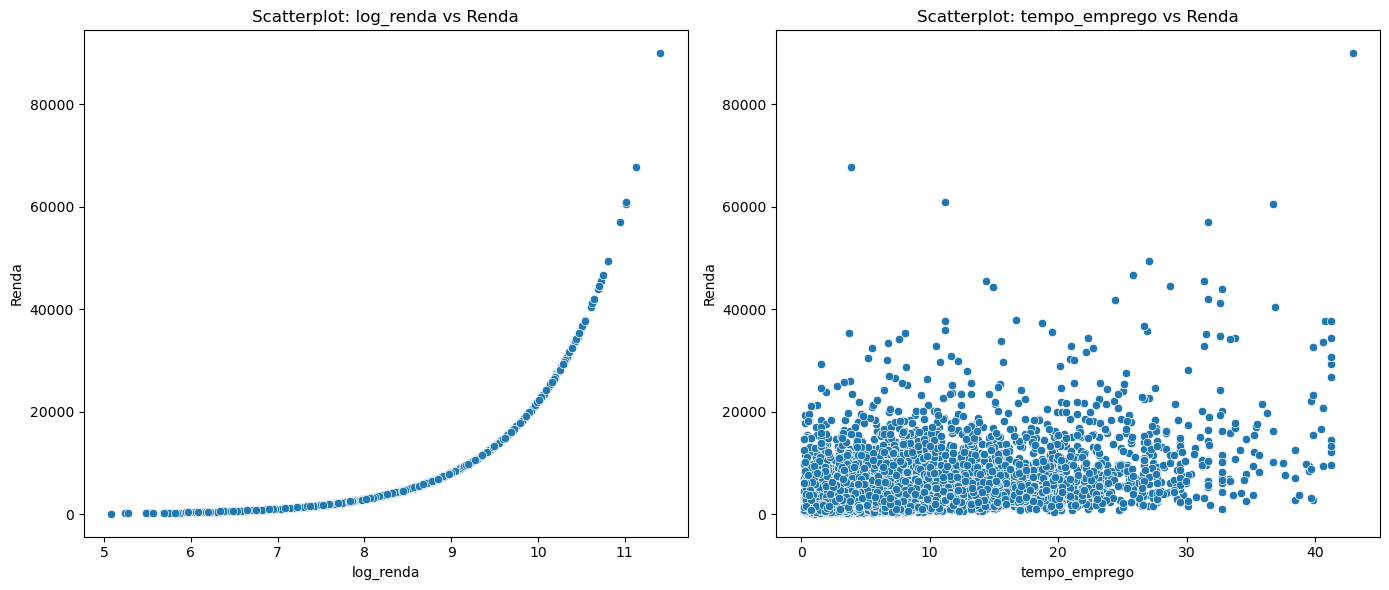

In [83]:
# Substituindo valores infinitos por NaN:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Selecionando apenas as variáveis quantitativas:
quantitative_vars = df.select_dtypes(include=[np.number])

# Calculando a correlação entre variáveis e a 'renda':
correlation_with_renda = quantitative_vars.corr()['renda'].drop('renda')

# Identificando as duas variáveis mais correlacionadas com a 'renda':
top_2_vars = correlation_with_renda.abs().nlargest(2).index

# Plotando o gráfico de dispersão para as duas variáveis mais correlacionadas com 'renda':
plt.figure(figsize=(14, 6))

for var in top_2_vars:
    plt.subplot(1, 2, top_2_vars.get_loc(var) + 1)
    sns.scatterplot(x=df[var], y=df['renda'])
    plt.title(f'Scatterplot: {var} vs Renda')
    plt.xlabel(var)
    plt.ylabel('Renda')

plt.tight_layout()
plt.show()


3) Na sua opinião, há outliers na variável renda?

##### A variável renda apresenta  outliers.

_________

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [85]:
# Substitundor valores infinitos por NaN:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Calculando o logaritmo da variável 'renda':
df['log_renda'] = np.log1p(df['renda'])  # usando log1p para lidar com valores zero e evitar -inf

# Mostrando as primeiras linhas do DataFrame com a nova coluna:
df[['renda', 'log_renda']].head()


,renda,log_renda
0,3369.24,8.122739
1,6096.14,8.715575
2,5658.98,8.641176
3,7246.69,8.888438
4,4017.37,8.298632


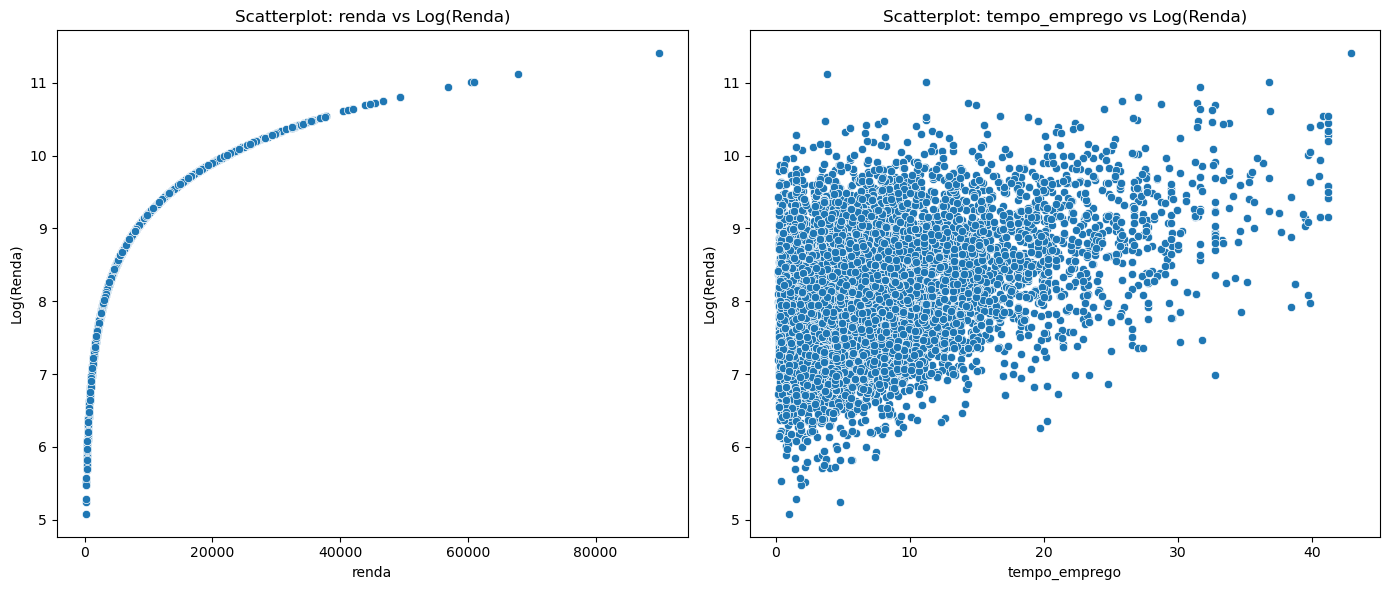

In [87]:
# Substituindo valores infinitos por NaN:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Calculando o logaritmo da variável 'renda':
df['log_renda'] = np.log1p(df['renda'])  # usando log1p para lidar com valores zero e evitar -inf

# Selecionando apenas as variáveis quantitativas:
quantitative_vars = df.select_dtypes(include=[np.number])

# Calculando a correlação entre variáveis e o logaritmo da 'renda':
correlation_with_log_renda = quantitative_vars.corr()['log_renda'].drop('log_renda')

# Identificando as duas variáveis mais correlacionadas com o logaritmo da 'renda':
top_2_vars = correlation_with_log_renda.abs().nlargest(2).index

# Plotando o gráfico de dispersão para as duas variáveis mais correlacionadas com o logaritmo da 'renda':
plt.figure(figsize=(14, 6))

for var in top_2_vars:
    plt.subplot(1, 2, top_2_vars.get_loc(var) + 1)
    sns.scatterplot(x=df[var], y=df['log_renda'])
    plt.title(f'Scatterplot: {var} vs Log(Renda)')
    plt.xlabel(var)
    plt.ylabel('Log(Renda)')

plt.tight_layout()
plt.show()


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

##### Com a aplicação do LOG, percebemos um agrupamento maior.